<a href="https://colab.research.google.com/github/tricucdu/bai-tap-ai/blob/bai-tap-ann/Ann_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3).astype('float32') / 255

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=880, batch_size=1000, validation_data=(x_test, y_test))


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

model.save("cifar100_ann_model.h5")



169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 449ms/step - accuracy: 0.0186 - loss: 4.5905 - val_accuracy: 0.0510 - val_loss: 4.2502
Epoch 2/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 418ms/step - accuracy: 0.0670 - loss: 4.1449 - val_accuracy: 0.0940 - val_loss: 3.9533
Epoch 3/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 428ms/step - accuracy: 0.1036 - loss: 3.8857 - val_accuracy: 0.1225 - val_loss: 3.7895
Epoch 4/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step - accuracy: 0.1320 - loss: 3.7248 - val_accuracy: 0.1389 - val_loss: 3.7112
Epoch 5/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 464ms/step - accuracy: 0.1467 - loss: 3.6332 - val_accuracy: 0.1520 - val_loss: 3.6111
Epoch 6/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 435ms/step - accuracy: 0.1666 - loss: 3.5289 - val_accuracy: 0.1659 - val_loss: 3.5530
Epoch 7/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 464ms/step - accuracy: 0.1783 - loss: 3.4637 - val_accuracy: 0.1783 - val_loss: 3.4983
Epoch 8/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 475ms/step - accuracy: 0.1948 - loss: 3.3809 - 

Test Accuracy: 23.16%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


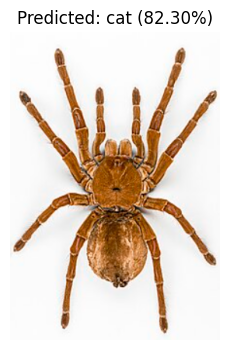

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


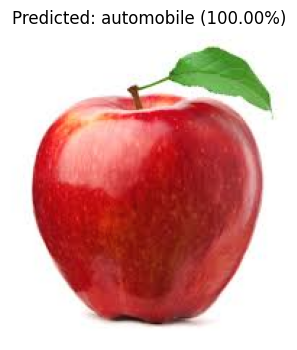

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


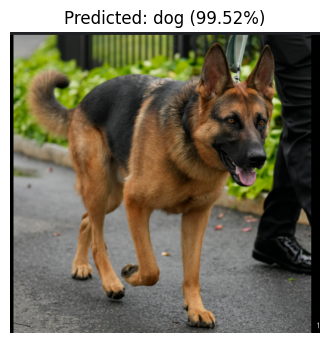

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


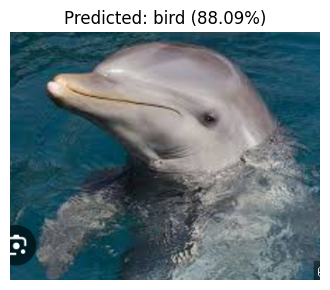

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


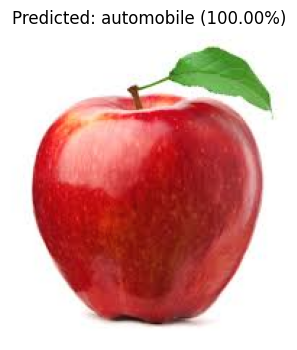

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


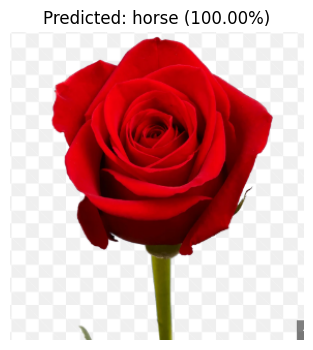

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


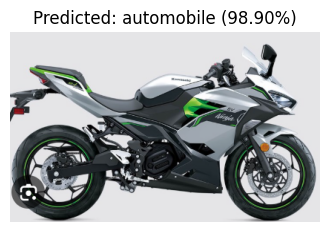

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


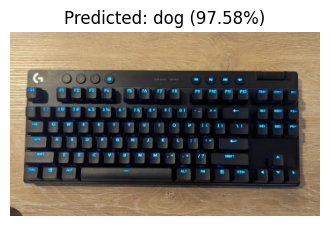

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


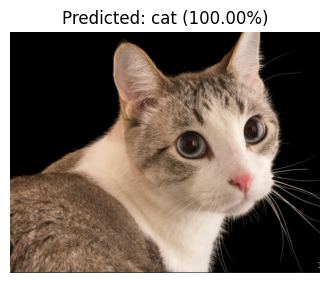

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


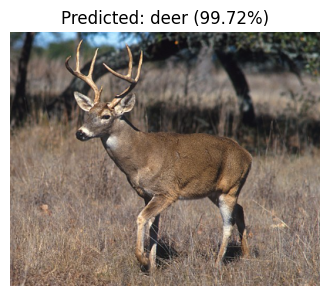

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


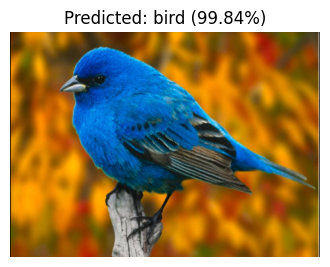

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


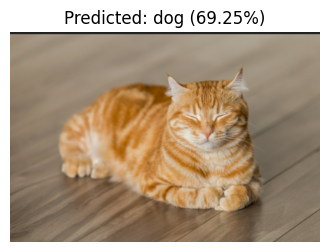

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


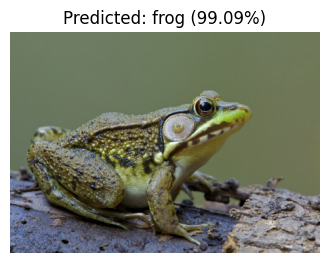

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


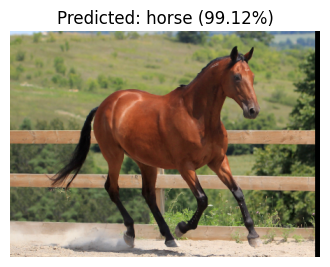

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


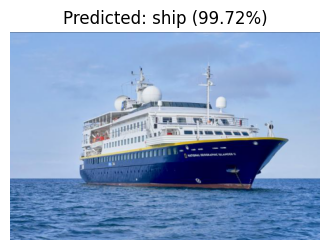

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


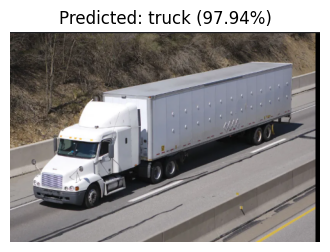

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


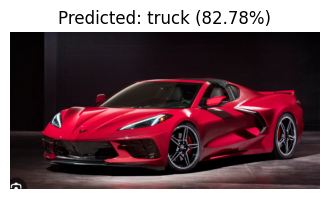

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = load_model("/content/cifar100_ann_model.h5")

class_labels = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck","apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]
class_labels_dict = {i: class_labels[i] for i in range(100)}

def predict_image(image_path, model):
    img = load_img(image_path, target_size=(32, 32))
    img = img_to_array(img)
    img = img / 255.0
    img = img.reshape(1, 32 * 32 * 3)

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions) * 100

    return class_labels_dict[predicted_class], confidence

def display_prediction(image_path, model):
    predicted_label, confidence = predict_image(image_path, model)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

image_paths = [
    "/content/Screenshot 2025-03-15 233447.png",
    "/content/Screenshot 2025-03-15 233641.png",
    "/content/Screenshot 2025-03-16 171557.png",
    "/content/Screenshot 2025-03-16 234701.png",
    "/content/Screenshot 2025-03-15 233641.png",
    "/content/Screenshot 2025-03-16 235923.png",
    "/content/Screenshot 2025-03-17 000005.png",
    "/content/Screenshot 2025-03-17 000118.png",
    "/content/Screenshot 2025-03-22 103942.png",
    "/content/Screenshot 2025-03-22 104030.png",
    "/content/bird.png",
    "/content/cat.png",
    "/content/frog.png",
    "/content/horse.png",
    "/content/ship.png",
    "/content/xe tair.png",
    "/content/xe.png",

]

for path in image_paths:
    display_prediction(path, model)
